#  <font> <font color="red">EDA <font>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import re
import requests

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhanasreedevi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot

ModuleNotFoundError: No module named 'plotly'

In [6]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
#from edm import report
import collections 
from collections import Counter

#NLTK
import nltk
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.util import ngrams

# spaCy based imports
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
eng_stopwords = STOP_WORDS


#Etc
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import operator 

#pd.set_option('max_colwidth',400)

In [8]:
import os
os.getcwd()

'/Users/dhanasreedevi/Desktop/EXcelr_Complete_Amazon_review_Project/2. EDA'

In [9]:
os.chdir('/Users/dhanasreedevi/Desktop/EXcelr_Complete_Amazon_review_Project/2. EDA')

In [10]:
# extracted rating from pages, and truncated actual rating  as rate_pt
df=pd.read_excel('reviews.xlsx')

# setting how much review to display
pd.set_option('max_colwidth',80)
df.head()


,reviews
0,\n\n I would say this is the best available Mic in this price range. This m...
1,"\n\n Hi,So, after using this mic for about a month I am writing this review..."
2,\n\n WHEN RECORDING ON PHONE OR LApTOP THE quality was the same as you get ...
3,\n\n It stoped working Within 2 months . While recording in starting it rec...
4,\n\n I will give my honest review on Boya M1. Read this full and i may help...


###  <font> <font color="green"> Exploratoratory Data Analysis <font>

In [11]:
# records and features
df.shape

(1000, 1)

In [12]:
#feature names
df.columns

Index(['reviews'], dtype='object')

In [13]:
# some statistical insights 
df.describe(include='all').T

,count,unique,top,freq
reviews,1000,990,"\n\n I cannot record my voice properly, Noise cancellation is very bad even...",2


In [14]:
# defining an empty data frame to amke a copy of data
df1=pd.DataFrame()  
df1=df.copy()

In [15]:
df1.head(2)

,reviews
0,\n\n I would say this is the best available Mic in this price range. This m...
1,"\n\n Hi,So, after using this mic for about a month I am writing this review..."


### <font> <font color="orange"> Feature Engineering

In [16]:
from textblob import TextBlob

In [17]:
df['review_len']=df['reviews'].apply(lambda x: len(x))
df['word_count']=df['reviews'].apply(lambda x: len(x.split()))

In [18]:
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len+len(word)
    return word_len/len(words)
df['avg_word_len']=df['reviews'].apply(lambda x:get_avg_word_len(x))

In [19]:
df.head(5)

,reviews,review_len,word_count,avg_word_len
0,\n\n I would say this is the best available Mic in this price range. This m...,400,73,4.410959
1,"\n\n Hi,So, after using this mic for about a month I am writing this review...",1500,253,4.909091
2,\n\n WHEN RECORDING ON PHONE OR LApTOP THE quality was the same as you get ...,403,73,4.452055
3,\n\n It stoped working Within 2 months . While recording in starting it rec...,237,42,4.523810
4,\n\n I will give my honest review on Boya M1. Read this full and i may help...,1847,364,4.057692


### Distribution of Review text length and word length

In [20]:
df['review_len'].iplot(kind='hist',xTitle="Review_length",yTitle="Count",title="Review length distribution") 

### <font> <font color="magenta" > Insight <font>
    
    observed that the most of the reviews have character length 0-250 

In [21]:
df['word_count'].iplot(kind='hist',xTitle="word_count",yTitle="Count",title="Word_count distribution") 

### <font> <font color="magenta" > Insight <font>
    
    observed that the most of the reviews have 1-50 words
    
    only few reviews are of length from 100 to 800 words (Long reviews)

In [22]:
df['avg_word_len'].iplot(kind='hist',xTitle="Avg_word_length",yTitle="Count",title="Avg_word length distribution") 

### <font> <font color="magenta" > Insight <font>
    
    observed that the most of the reviews are words of length 4 or 6 

In [23]:
# write a function to print reviews of length 1
single_word_list=[]
for x in df['reviews']:
    p= len(x.split())
    if(p==1):
        single_word_list.append(x)     
single_word_len=len(single_word_list)
print(single_word_len)
print(single_word_list)

1
['\n\n  Average\n\n']


In [24]:
# write a function to print reviews of length 2
two_word_list=[]
for x in df['reviews']:
    p= len(x.split())
    if(p==2):
        two_word_list.append(x)
two_word_len=len(two_word_list)
print(two_word_len)
print(two_word_list)

## observed one and two words are mostly ajjectives with postive or negative sentimensts,
## so we didnt remove them


1
['\n\n  Fake product\n\n']


In [25]:
# definng a function to count the re occurences
def count_regexp_occ(regexp="", text=None):

    return len(re.findall(regexp, text))

In [26]:
# writing a function
def numerical_features(df):
    df['char_count'] = df['reviews'].apply(len)
    df['num_words'] = df['reviews'].apply(lambda comment: len(comment.split()))
    df['capitals'] = df['reviews'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    #df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['char_count']),
    #axis=1)
    df['#!_marks'] = df['reviews'].apply(lambda comment: comment.count("!"))
    df['#?_marks'] = df['reviews'].apply(lambda comment: comment.count("?"))
    df['num_punctuation'] = df['reviews'].apply(lambda x: 
                            len([c for c in str(x) if c in string.punctuation]))
    df['num_stopwords'] = df['reviews'].apply(lambda x: 
                            len([w for w in str(x).lower().split() if w in eng_stopwords]))
    df['num_symbols'] = df['reviews'].apply(lambda comment: sum(comment.count(w) for w in "*&$%"))
    df['mean_word_len'] = df['reviews'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['num_unique_words'] = df['reviews'].apply(lambda comment: len(set(w for w in comment.split())))
    #df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
    df['num_smilies'] = df['reviews'].apply(lambda comment:sum(comment.count(w) 
                                                for w in (':-)',':)',';-)',';)')))
# Count number of \n
    df['ant_slash_n'] = df['reviews'].apply(lambda x: count_regexp_occ(r"\n", x))

# Check for time stamp
    df['has_timestamp'] = df['reviews'].apply(lambda x: count_regexp_occ(r"\d{2}|:\d{2}", x))

# Check for http links
    df['has_http'] = df['reviews'].apply(lambda x: count_regexp_occ(r"http[s]{0,1}://\S+", x))
    return


In [27]:
numerical_features(df)

In [28]:
# dataframe attached with numerical features
df.head(3).T

,0,1,2
reviews,\n\n I would say this is the best available Mic in this price range. This m...,"\n\n Hi,So, after using this mic for about a month I am writing this review...",\n\n WHEN RECORDING ON PHONE OR LApTOP THE quality was the same as you get ...
review_len,400,1500,403
word_count,73,253,73
avg_word_len,4.410959,4.909091,4.452055
char_count,400,1500,403
num_words,73,253,73
capitals,28,85,38
#!_marks,0,0,0
#?_marks,0,2,0
num_punctuation,15,61,8


##### <font> <font color="orange"> Part of Speech analysis <font>

In [29]:
## POS tag Analysis
def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    adverb_count = len([w for w in pos_list if w[1] in ('RB','RBR','RBS')])
    
    return[noun_count, adjective_count, verb_count,adverb_count]

In [30]:
nltk.download('averaged_perceptron_tagger')
for df in ([df]):
    df['nouns'], df['adjectives'], df['verbs'],df['adverbs'] = zip(*df['reviews'].apply(lambda comment: tag_part_of_speech(comment)))
    df['nouns_vs_length'] = df['nouns'] / df['char_count']
    df['adjectives_vs_length'] = df['adjectives'] / df['char_count']
    df['verbs_vs_length'] = df['verbs'] /df['char_count']
    df['nouns_vs_words'] = df['nouns'] / df['num_words']
    df['adjectives_vs_words'] = df['adjectives'] / df['num_words']
    df['verbs_vs_words'] = df['verbs'] / df['num_words']
    

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dhanasreedevi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
df.head(3).T

,0,1,2
reviews,\n\n I would say this is the best available Mic in this price range. This m...,"\n\n Hi,So, after using this mic for about a month I am writing this review...",\n\n WHEN RECORDING ON PHONE OR LApTOP THE quality was the same as you get ...
review_len,400,1500,403
word_count,73,253,73
avg_word_len,4.410959,4.909091,4.452055
char_count,400,1500,403
num_words,73,253,73
capitals,28,85,38
#!_marks,0,0,0
#?_marks,0,2,0
num_punctuation,15,61,8


count    1000.000000
mean       55.731000
std        55.880061
min         1.000000
25%        30.000000
50%        44.000000
75%        65.000000
max       863.000000
Name: reviews, dtype: float64


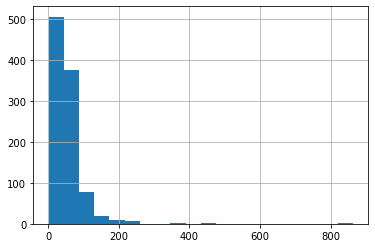

In [32]:
# observing review lengths, counts
lens = df.reviews.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist(bins=20)

#### <font> <font color="magenta"> Some insights
    observed nearly 4500+ reviews are of with length apprx= (0-50) words
      
    only few reviews are of length from 100 to 800 words (Long reviews)

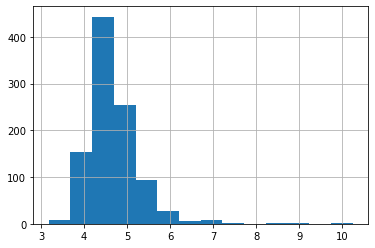

In [33]:
# avg word length in each review
df['reviews'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=14)


### <font> <font color="magenta" > Insight <font>
    
    observed that the most of the reviews are words of length 4 or 5 

### <font> <font color="orange"> Ngram exploration before removing stop words & lemmatization

In [34]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# getting top n grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

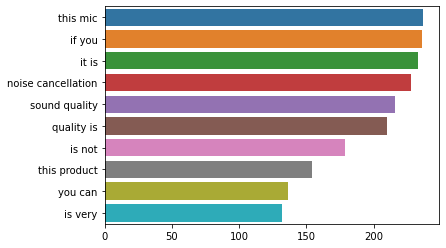

In [36]:
#Two words N_gram
top_n_bigrams=get_top_ngram(df['reviews'],2)[:10]
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

In [37]:
pos_list=[]
for i in x:
    pos_list.append(pos_tag(i.split()))
pos_list
## observing 2_gram map and POS_tag, 2_grams didnt preserve that much of sentiments 
## through adjectives 

[[('this', 'DT'), ('mic', 'NN')],
 [('if', 'IN'), ('you', 'PRP')],
 [('it', 'PRP'), ('is', 'VBZ')],
 [('noise', 'NN'), ('cancellation', 'NN')],
 [('sound', 'JJ'), ('quality', 'NN')],
 [('quality', 'NN'), ('is', 'VBZ')],
 [('is', 'VBZ'), ('not', 'RB')],
 [('this', 'DT'), ('product', 'NN')],
 [('you', 'PRP'), ('can', 'MD')],
 [('is', 'VBZ'), ('very', 'RB')]]

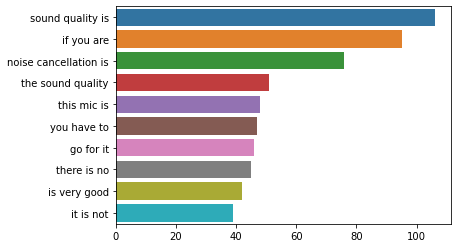

In [38]:
#Three words N_gram
top_n_bigrams=get_top_ngram(df['reviews'],3)[:10]
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

In [39]:
pos_list=[]
for i in x:
    pos_list.append(pos_tag(i.split()))
pos_list

[[('sound', 'JJ'), ('quality', 'NN'), ('is', 'VBZ')],
 [('if', 'IN'), ('you', 'PRP'), ('are', 'VBP')],
 [('noise', 'NN'), ('cancellation', 'NN'), ('is', 'VBZ')],
 [('the', 'DT'), ('sound', 'NN'), ('quality', 'NN')],
 [('this', 'DT'), ('mic', 'NN'), ('is', 'VBZ')],
 [('you', 'PRP'), ('have', 'VBP'), ('to', 'TO')],
 [('go', 'VB'), ('for', 'IN'), ('it', 'PRP')],
 [('there', 'EX'), ('is', 'VBZ'), ('no', 'DT')],
 [('is', 'VBZ'), ('very', 'RB'), ('good', 'JJ')],
 [('it', 'PRP'), ('is', 'VBZ'), ('not', 'RB')]]

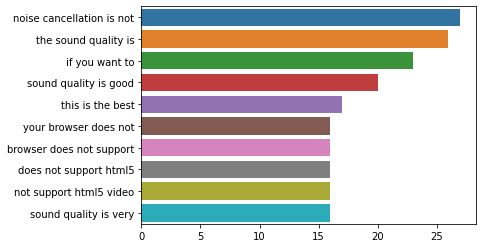

In [40]:
#four words N_gram
top_n_bigrams=get_top_ngram(df['reviews'],4)[:10]
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

In [41]:
pos_list=[]
for i in x:
    pos_list.append(pos_tag(i.split()))
pos_list

[[('noise', 'NN'), ('cancellation', 'NN'), ('is', 'VBZ'), ('not', 'RB')],
 [('the', 'DT'), ('sound', 'NN'), ('quality', 'NN'), ('is', 'VBZ')],
 [('if', 'IN'), ('you', 'PRP'), ('want', 'VBP'), ('to', 'TO')],
 [('sound', 'JJ'), ('quality', 'NN'), ('is', 'VBZ'), ('good', 'JJ')],
 [('this', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('best', 'JJS')],
 [('your', 'PRP$'), ('browser', 'NN'), ('does', 'VBZ'), ('not', 'RB')],
 [('browser', 'NN'), ('does', 'VBZ'), ('not', 'RB'), ('support', 'VB')],
 [('does', 'VBZ'), ('not', 'RB'), ('support', 'VB'), ('html5', 'NN')],
 [('not', 'RB'), ('support', 'VB'), ('html5', 'NN'), ('video', 'NN')],
 [('sound', 'JJ'), ('quality', 'NN'), ('is', 'VBZ'), ('very', 'RB')]]

### <font> <font color="magenta"> Insight on 2,3,4_grams
    
   1.  we can observe that many people are worried of sound quality, noise cancellation, working of   
       mic
   2.  adjectives are somewhat in frequent in top 2,3,4_grams

##  <font> <font color="red"> Data Preprocesssing

In [42]:
pd.set_option('display.max_colwidth', -1) # to display entire record text

In [43]:
df['reviews'][0:3]

0    \n\n  I would say this is the best available Mic in this price range. This mic can be connected to your DSLR, Smarthones, Laptops etc.Pros :1. Long Wire2. Sound Quality is really good and richCons :1. It will pick background noise, if you are in a noisy environment. But you can use RecForge 2 Audio Recorder App in your smartphone to Remove All The Noises.Apart from that, it's all gold. Go for it 😊\n\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### <font><font color="Magenta"> Insight 

clearly we can see that the reviews have special characters like: 😊,\n,ASCII, some capitalzed words, 

some short forms like don't (called as contractions), will preprocess to remove all these types

In [44]:
# Converting Strings to Lowercase
df['reviews'] = [review.strip().lower() for review in df['reviews']]
df['reviews'][:5]

0    i would say this is the best available mic in this price range. this mic can be connected to your dslr, smarthones, laptops etc.pros :1. long wire2. sound quality is really good and richcons :1. it will pick background noise, if you are in a noisy environment. but you can use recforge 2 audio recorder app in your smartphone to remove all the noises.apart from that, it's all gold. go for it 😊                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### <font> <font color="Green"> Defining the functions to perform basic wranglings like 

- **expanding contractions......like don't as do not**
 
- **remove accented characters... like e~, etc**

- **scrub words.... to remove special characters like ?, * etc**

In [45]:
df['reviews'][1]

"hi,so, after using this mic for about a month i am writing this review.i will give the most genuine review of this mic.so, let's begin. what does a beginner need?a budget-friendly mic yet gives the best output. right?built quality-mic piece is very compact and handy to use. given its compact size, it makes it convenient to carry anywhere you want-cable/wire is extraordinarily long (6 meters). however, that's a great plus point. the long wire makes recording much easier and hassle-free-it has a velcro for cable management. so, not a difficult task to keep the lengthy wire under control.-it weighs around 100gms-there are no batteries included-there's a switch on/off button. while recording you need to switch to camera mode (don't really know why its written camera)sound quality-my recordings have improved considerably with this mic and i am loving it.-just one complaint i have. it captures a lot of airflow meaning i can hear a lot of air from my mouth in the final output. even if i reco

In [46]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"

}

In [47]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

### <font> <font color="orange"> Invoking the expand_contractions functions

In [48]:
df['reviews'] = [expand_contractions(re.sub('’', "'", review)) for review in df['reviews']]
df['reviews'][4]

'i will give my honest review on boya m1. read this full and i may help you clear your dilemma. if you need in depth review i have a review video on youtube. go to youtube . com / mobiletechpoint or search for "mobile tech point boya m1" and you will find the review video. audio for the entire video has been recorded with boya m1.1. i bought boya m1 for 800 rupees. so this is a great pro mic for the price.2. first thing we notice is that the cable is 6 meters long which is super lengthy. so you have to be good in cable management. it is nice to see that battery unit is made of metal. if you use the mic with smartphones you do not need a battery because the mic draws the power from the phone. but in case of dslr, you need to switch to camera mode. good part of this mic is that it can connect with smartphones, tablets, pc, dslr\'s  and external audio recorders like zoom h1n. that is pretty awesome right?3. for the price we pay, this mic gives you excellent quality audio. having a 6-meter

In [49]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [50]:
df['reviews'][3]

'it stoped working within 2 months . while recording in starting it record for few seconds then after that records nothing . you will hear nothing recorded through this mic . worst mic .my whole amount got wasted . very dispointed .'

### <font> <font color="blue"> Invoking the remove_accented_chars functions

In [51]:
df['reviews'] = [remove_accented_chars(review) for review in df['reviews']]
df['reviews'][3]

'it stoped working within 2 months . while recording in starting it record for few seconds then after that records nothing . you will hear nothing recorded through this mic . worst mic .my whole amount got wasted . very dispointed .'

In [52]:
df['reviews'][0]

'i would say this is the best available mic in this price range. this mic can be connected to your dslr, smarthones, laptops etc.pros :1. long wire2. sound quality is really good and richcons :1. it will pick background noise, if you are in a noisy environment. but you can use recforge 2 audio recorder app in your smartphone to remove all the noises.apart from that, it is all gold. go for it '

In [53]:
# defining function to scrub special characters
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

### <font> <font color="blue"> Invoking the scrub function

In [54]:
pd.set_option('display.max_colwidth', -1)

In [55]:
df['reviews'] = [scrub_words(review) for review in df['reviews']]
df['reviews'][2]

'when recording on phone or laptop the quality was the same as you get from a regular headphone i watched review about this product on y tube even on the technical guruji channel its a marketing strategy i guess these are useless microphones with no noise cancellation i dont know about if you r using it on dslr but on fon or pc it will give no special output same fan noise and all returned'

In [56]:
df.head().T

,0,1,2,3,4
reviews,i would say this is the best available mic in this price range this mic can be connected to your dslr smarthones laptops etc pros long wire sound quality is really good and richcons it will pick background noise if you are in a noisy environment but you can use recforge audio recorder app in your smartphone to remove all the noises apart from that it is all gold go for it,hi so after using this mic for about a month i am writing this review i will give the most genuine review of this mic so let us begin what does a beginner need a budget friendly mic yet gives the best output right built quality mic piece is very compact and handy to use given its compact size it makes it convenient to carry anywhere you want cable wire is extraordinarily long meters however that is a great plus point the long wire makes recording much easier and hassle free it has a velcro for cable management so not a difficult task to keep the lengthy wire under control it weighs around gms there are no batteries included there s a switch on off button while recording you need to switch to camera mode don t really know why its written camera sound quality my recordings have improved considerably with this mic and i am loving it just one complaint i have it captures a lot of airflow meaning i can hear a lot of air from my mouth in the final output even if i record anything while holding the mic from a considerable distance i can hear my breathing sounds sound quality is loud enough and crisp it does capture my room s ceiling fan sound so i can hear that whoosh sound in the background when i am plugged into my earphones i record with the ac on and keep the fan switched off also it comes with a handy pouch to keep your mic safe yay so finally best for production for a beginner like me because at this price it gives ample quality output,when recording on phone or laptop the quality was the same as you get from a regular headphone i watched review about this product on y tube even on the technical guruji channel its a marketing strategy i guess these are useless microphones with no noise cancellation i dont know about if you r using it on dslr but on fon or pc it will give no special output same fan noise and all returned,it stoped working within months while recording in starting it record for few seconds then after that records nothing you will hear nothing recorded through this mic worst mic my whole amount got wasted very dispointed,i will give my honest review on boya m read this full and i may help you clear your dilemma if you need in depth review i have a review video on youtube go to youtube com mobiletechpoint or search for mobile tech point boya m and you will find the review video audio for the entire video has been recorded with boya m i bought boya m for rupees so this is a great pro mic for the price first thing we notice is that the cable is meters long which is super lengthy so you have to be good in cable management it is nice to see that battery unit is made of metal if you use the mic with smartphones you do not need a battery because the mic draws the power from the phone but in case of dslr you need to switch to camera mode good part of this mic is that it can connect with smartphones tablets pc dslr s and external audio recorders like zoom h n that is pretty awesome right for the price we pay this mic gives you excellent quality audio having a meter cable can be an advantage or disadvantage it depends on how you look at it if you are using the mic with external recorder you do not need a m cable but if you are using the mic with a dslr camera and if you want to move around it gives you all the freedom the other only concern that you need to be aware of is since there is no battery indicator you might want to carry an extra battery if you are going to record something important which you do not want to miss at all put in a new battery and you will be fine if you are into audio recording then boya m lavalier mic is a must 

 ### <font> <font color="magenta"> INSIGHT :we can clearly observe the above reviews are scrubbed to our requirement

In [57]:
numerical_features(df)

In [58]:
df.head(3).T

,0,1,2
reviews,i would say this is the best available mic in this price range this mic can be connected to your dslr smarthones laptops etc pros long wire sound quality is really good and richcons it will pick background noise if you are in a noisy environment but you can use recforge audio recorder app in your smartphone to remove all the noises apart from that it is all gold go for it,hi so after using this mic for about a month i am writing this review i will give the most genuine review of this mic so let us begin what does a beginner need a budget friendly mic yet gives the best output right built quality mic piece is very compact and handy to use given its compact size it makes it convenient to carry anywhere you want cable wire is extraordinarily long meters however that is a great plus point the long wire makes recording much easier and hassle free it has a velcro for cable management so not a difficult task to keep the lengthy wire under control it weighs around gms there are no batteries included there s a switch on off button while recording you need to switch to camera mode don t really know why its written camera sound quality my recordings have improved considerably with this mic and i am loving it just one complaint i have it captures a lot of airflow meaning i can hear a lot of air from my mouth in the final output even if i record anything while holding the mic from a considerable distance i can hear my breathing sounds sound quality is loud enough and crisp it does capture my room s ceiling fan sound so i can hear that whoosh sound in the background when i am plugged into my earphones i record with the ac on and keep the fan switched off also it comes with a handy pouch to keep your mic safe yay so finally best for production for a beginner like me because at this price it gives ample quality output,when recording on phone or laptop the quality was the same as you get from a regular headphone i watched review about this product on y tube even on the technical guruji channel its a marketing strategy i guess these are useless microphones with no noise cancellation i dont know about if you r using it on dslr but on fon or pc it will give no special output same fan noise and all returned
review_len,400,1500,403
word_count,73,253,73
avg_word_len,4.410959,4.909091,4.452055
char_count,375,1459,391
num_words,72,280,75
capitals,0,0,0
#!_marks,0,0,0
#?_marks,0,0,0
num_punctuation,0,0,0


### <font> <font color="red"> NULL_VALUES

In [59]:
# Null values in reviews

df['reviews'].isna().sum()

# no null found

0

### <font> <font color="red"> Removing stop words from df 

In [60]:
df

,reviews,review_len,word_count,avg_word_len,char_count,num_words,capitals,#!_marks,#?_marks,num_punctuation,...,nouns,adjectives,verbs,adverbs,nouns_vs_length,adjectives_vs_length,verbs_vs_length,nouns_vs_words,adjectives_vs_words,verbs_vs_words
0,i would say this is the best available mic in this price range this mic can be connected to your dslr smarthones laptops etc pros long wire sound quality is really good and richcons it will pick background noise if you are in a noisy environment but you can use recforge audio recorder app in your smartphone to remove all the noises apart from that it is all gold go for it,400,73,4.410959,375,72,0,0,0,0,...,23,3,11,3,0.057500,0.007500,0.027500,0.315068,0.041096,0.150685
1,hi so after using this mic for about a month i am writing this review i will give the most genuine review of this mic so let us begin what does a beginner need a budget friendly mic yet gives the best output right built quality mic piece is very compact and handy to use given its compact size it makes it convenient to carry anywhere you want cable wire is extraordinarily long meters however that is a great plus point the long wire makes recording much easier and hassle free it has a velcro for cable management so not a difficult task to keep the lengthy wire under control it weighs around gms there are no batteries included there s a switch on off button while recording you need to switch to camera mode don t really know why its written camera sound quality my recordings have improved considerably with this mic and i am loving it just one complaint i have it captures a lot of airflow meaning i can hear a lot of air from my mouth in the final output even if i record anything while holding the mic from a considerable distance i can hear my breathing sounds sound quality is loud enough and crisp it does capture my room s ceiling fan sound so i can hear that whoosh sound in the background when i am plugged into my earphones i record with the ac on and keep the fan switched off also it comes with a handy pouch to keep your mic safe yay so finally best for production for a beginner like me because at this price it gives ample quality output,1500,253,4.909091,1459,280,0,0,0,0,...,62,25,52,16,0.041333,0.016667,0.034667,0.245059,0.098814,0.205534
2,when recording on phone or laptop the quality was the same as you get from a regular headphone i watched review about this product on y tube even on the technical guruji channel its a marketing strategy i guess these are useless microphones with no noise cancellation i dont know about if you r using it on dslr but on fon or pc it will give no special output same fan noise and all returned,403,73,4.452055,391,75,0,0,0,0,...,31,6,9,1,0.076923,0.014888,0.022333,0.424658,0.082192,0.123288
3,it stoped working within months while recording in starting it record for few seconds then after that records nothing you will hear nothing recorded through this mic worst mic my whole amount got wasted very dispointed,237,42,4.523810,219,36,0,0,0,0,...,11,5,8,2,0.046414,0.021097,0.033755,0.261905,0.119048,0.190476
4,i will give my honest review on boya m read this full and i may help you clear your dilemma if you need in depth review i have a review video on youtube go to youtube com mobiletechpoint or search for mobile tech point boya m and you will find the review video audio for the entire video has been recorded with boya m i bought boya m for rupees so this is a great pro mic for the price first thing we notice is that the cable is meters long which is super lengthy so you have to be good in cable management it is nice to see that battery unit is made of metal if you use the mic with smartphones you do not need a battery because the mic draws the power from the phone but in case of dslr you need to switch to camera mode good part of this mic is that it can connect with smartphones tablets pc dslr s and external audio recorders like zoom h n that is pretty awesome right for the price we pay thi

In [61]:
from nltk.corpus import stopwords
stop_words= stopwords.words('english')
print(stop_words)
print(len(stop_words))
print(type(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [62]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new


#remove stopwords from the text
df['reviews'] = [remove_stopwords(r.split()) for r in df['reviews']]


In [63]:
df['reviews'][1]

'hi using mic month writing review give genuine review mic let us begin beginner need budget friendly mic yet gives best output right built quality mic piece compact handy use given compact size makes convenient carry anywhere want cable wire extraordinarily long meters however great plus point long wire makes recording much easier hassle free velcro cable management difficult task keep lengthy wire control weighs around gms batteries included switch button recording need switch camera mode really know written camera sound quality recordings improved considerably mic loving one complaint captures lot airflow meaning hear lot air mouth final output even record anything holding mic considerable distance hear breathing sounds sound quality loud enough crisp capture room ceiling fan sound hear whoosh sound background plugged earphones record ac keep fan switched also comes handy pouch keep mic safe yay finally best production beginner like price gives ample quality output'

In [64]:
df.columns

Index(['reviews', 'review_len', 'word_count', 'avg_word_len', 'char_count',
       'num_words', 'capitals', '#!_marks', '#?_marks', 'num_punctuation',
       'num_stopwords', 'num_symbols', 'mean_word_len', 'num_unique_words',
       'num_smilies', 'ant_slash_n', 'has_timestamp', 'has_http', 'nouns',
       'adjectives', 'verbs', 'adverbs', 'nouns_vs_length',
       'adjectives_vs_length', 'verbs_vs_length', 'nouns_vs_words',
       'adjectives_vs_words', 'verbs_vs_words'],
      dtype='object')

In [65]:
df=df.drop(labels=['review_len', 'word_count','avg_word_len','char_count','capitals', 'num_words','#!_marks', '#?_marks', 'num_punctuation','num_stopwords', 'num_symbols', 'mean_word_len','num_unique_words','num_smilies', 'ant_slash_n', 'has_timestamp', 'has_http','nouns_vs_length','adjectives_vs_length', 'verbs_vs_length', 'nouns_vs_words','adjectives_vs_words', 'verbs_vs_words' ],axis=1)

In [66]:
df.columns

Index(['reviews', 'nouns', 'adjectives', 'verbs', 'adverbs'], dtype='object')

In [67]:
df=df.drop(labels=['nouns', 'adjectives','verbs','adverbs'],axis=1)

In [68]:
df.columns

Index(['reviews'], dtype='object')

 ##  <font> <font color="red"> using VADER Sentiment Analysis on reviews to assign labels

## first observing how vader sentimentanalyzer works

nltk.download('vader_lexicon')

In [69]:
# Import SentimentIntensityAnalyzer and create an sid object
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [70]:
pd.set_option('max_colwidth',-1)

https://blog.quantinsti.com/vader-sentiment/#:~:text=Compound%20VADER%20scores%20for%20analyzing,1%20(most%20extreme%20positive).

## on vader compound score (Valence Aware Dictionary and sEntiment Reasoning)
What is Valence Score?

It is a score assigned to the word under consideration by means of observation 
and experiences rather than pure logic.
Consider the words 'terrible' , 'hopeless', 'miserable'.
Any self-aware Human would easily gauge the sentiment of these words as Negative.
While on the other side, words like 'marvellous', 'worthy', 'adequate' 
are signifying positive sentiment.
According to the academic paper on VADER,
the Valence score is measured on a scale from -4 to +4, 
where -4 stands for the most ‘Negative’ sentiment 
and +4 for the most ‘Positive’ sentiment. 
Intuitively one can guess that midpoint 0 represents ‘Neutral’ Sentiment, 

How does VADER calculate the Valence score of an input text?

Valence score of some context-free text are:-

Positive Valence: "okay" is 0.9 "good" is 1.9, and "great" is 3.1,
Negative Valence: "horrible" is –2.5, emoticon ' :( ' is –2.2, 
and "sucks" and it's slang derivative "sux" are both –1.5.

VADER analyses sentiments primarily based on certain key points:
    
1. Punctuation: The use of an exclamation mark(!), increases the magnitude of the intensity 
without modifying the semantic orientation. For example, “The food here is good!” 
is more intense than “The food here is good.” 
and an increase in the number of (!), increases the magnitude accordingly.

2.Capitalization: Using upper case letters to emphasize a sentiment-relevant word 
in the presence of other non-capitalized words, 
increases the magnitude of the sentiment intensity. 
For example, “The food here is GREAT!” conveys more intensity 
than “The food here is great!”

3.Degree modifiers: Also called intensifiers, they impact the sentiment intensity 
by either increasing or decreasing the intensity. 
For example, “The service here is extremely good” is more intense than 
“The service here is good”, whereas “The service here is marginally good” reduces the intensity.

4. Conjunctions: Use of conjunctions like “but” signals a shift in sentiment polarity,
with the sentiment of the text following the conjunction being dominant.
“The food here is great, but the service is horrible” has mixed sentiment, 
with the latter half dictating the overall rating.



In [71]:
## few examples showing impact of above key points

In [72]:
## define function to analyze score

def sentiment_analyzer_scores(sentence):
    score = sid.polarity_scores(sentence)
    print("{:-<30} {}".format(sentence, str(score)))

In [73]:
sentiment_analyzer_scores("the weather is cool.")
sentiment_analyzer_scores("the weather is super cool.")

# sid_obj = SentimentIntensityAnalyzer() 

# sentiment_dict = sid_obj.polarity_scores('the weather is cool.') 

# print("Overall sentiment dictionary is : ", sentiment_dict) 
# print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
# print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
# print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

the weather is cool.---------- {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}
the weather is super cool.---- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


In [74]:
0.0+.566+.434 # sum of neg, neu,pos scores adds up to 1

1.0

In [75]:
## analyzing on punctuated sentence

## with verb alone
sentiment_analyzer_scores("it was raining")
sentiment_analyzer_scores("it was raining!")
sentiment_analyzer_scores("it was raining!!")
sentiment_analyzer_scores("it was damm raining ")


it was raining---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
it was raining!--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
it was raining!!-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
it was damm raining ---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [76]:
# with verb and adjective and !
sentiment_analyzer_scores("it was raining ")
sentiment_analyzer_scores("it was good")
sentiment_analyzer_scores("it was raining good")
sentiment_analyzer_scores("it was raining good !")
sentiment_analyzer_scores("it was raining good !!")

sentiment_analyzer_scores("it was damm raining good !")
sentiment_analyzer_scores("it was damm raining good !!")
sentiment_analyzer_scores("it was damm raining good !!!")
sentiment_analyzer_scores("it was damm raining good !!!!!!!")


it was raining --------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
it was good------------------- {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
it was raining good----------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
it was raining good !--------- {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}
it was raining good !!-------- {'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.5399}
it was damm raining good !---- {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4926}
it was damm raining good !!--- {'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.5399}
it was damm raining good !!!-- {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.5826}
it was damm raining good !!!!!!! {'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.6209}


In [77]:
## will negitive sentiment raises with ?

sentiment_analyzer_scores("was it raining ")
sentiment_analyzer_scores("was it raining ?")
sentiment_analyzer_scores("was it raining ??")
sentiment_analyzer_scores("was it raining good ?")
sentiment_analyzer_scores("was it raining good ??")
sentiment_analyzer_scores("it was raining good ???")

### observed ? is not impacting sentiment score

was it raining --------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
was it raining ?-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
was it raining ??------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
was it raining good ?--------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
was it raining good ??-------- {'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.504}
it was raining good ???------- {'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.533}


In [78]:
word=['raining','good','rainy','damm','campus']
list1=nltk.pos_tag(word)
print(list1)

# check first statement only verb score is 0
# observe 2 nd adding ajective raised compound score by reducing neu
# observe 3 rd, verb with adjective score is same as alone adjective 

# observed that presence of adjectives increased compound score
# presence of two ! increased the compound sentiment score

[('raining', 'VBG'), ('good', 'JJ'), ('rainy', 'NN'), ('damm', 'NN'), ('campus', 'NN')]


In [79]:
# with capitilized words

sentiment_analyzer_scores("the campus is good")
sentiment_analyzer_scores("the campus is GOOD")
sentiment_analyzer_scores("the CAMPUS is GOOD")
sentiment_analyzer_scores("the CAMPUS is GOOD !")

# capitilization of adjectves increased the score
# an ! added the score further

the campus is good------------ {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
the campus is GOOD------------ {'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.5622}
the CAMPUS is GOOD------------ {'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.5622}
the CAMPUS is GOOD !---------- {'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.6027}


In [80]:
# with conjunctions

sentiment_analyzer_scores("the campus is good,the canteen is horrible")
sentiment_analyzer_scores("the campus is good,but the canteen is horrible")
sentiment_analyzer_scores("the campus is good,and the canteen is horrible")
sentiment_analyzer_scores("the campus is good,yet the canteen is horrible")
sentiment_analyzer_scores(" the canteen is horrible, although the campus is good")


# cunjuction raised compound score sentimentizing positive


the campus is good,the canteen is horrible {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.5423}
the campus is good,but the canteen is horrible {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}
the campus is good,and the canteen is horrible {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}
the campus is good,yet the canteen is horrible {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}
 the canteen is horrible, although the campus is good {'neg': 0.261, 'neu': 0.522, 'pos': 0.216, 'compound': -0.1531}


In [81]:
# using emojis,Emoticons
sentiment_analyzer_scores('the canteen is')
sentiment_analyzer_scores('the canteen is :)') # though there is no adjective emoticons raised score
sentiment_analyzer_scores(':D')
sentiment_analyzer_scores('the canteen is :(')
sentiment_analyzer_scores(':|')

#print(sentiment_analyzer_scores('☹️'))


# using emojis and emoticons raised score

the canteen is---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
the canteen is :)------------- {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}
:D---------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
the canteen is :(------------- {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}
:|---------------------------- {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1027}


## we will now use vader to assign labels using 


In [82]:
df.head(3).T

,0,1,2
reviews,would say best available mic price range mic connected dslr smarthones laptops etc pros long wire sound quality really good richcons pick background noise noisy environment use recforge audio recorder app smartphone remove noises apart gold go,hi using mic month writing review give genuine review mic let us begin beginner need budget friendly mic yet gives best output right built quality mic piece compact handy use given compact size makes convenient carry anywhere want cable wire extraordinarily long meters however great plus point long wire makes recording much easier hassle free velcro cable management difficult task keep lengthy wire control weighs around gms batteries included switch button recording need switch camera mode really know written camera sound quality recordings improved considerably mic loving one complaint captures lot airflow meaning hear lot air mouth final output even record anything holding mic considerable distance hear breathing sounds sound quality loud enough crisp capture room ceiling fan sound hear whoosh sound background plugged earphones record ac keep fan switched also comes handy pouch keep mic safe yay finally best production beginner like price gives ample quality output,recording phone laptop quality get regular headphone watched review product tube even technical guruji channel marketing strategy guess useless microphones noise cancellation dont know r using dslr fon pc give special output fan noise returned


In [83]:
df['scores'] = df['reviews'].apply(lambda reviews:sid.polarity_scores(reviews))
#df_pre['scores2'] = df_pre['review_lemm'].apply(lambda review_lemm:sid.polarity_scores(review_lemm))
df.head(2)

,reviews,scores
0,would say best available mic price range mic connected dslr smarthones laptops etc pros long wire sound quality really good richcons pick background noise noisy environment use recforge audio recorder app smartphone remove noises apart gold go,"{'neg': 0.039, 'neu': 0.789, 'pos': 0.172, 'compound': 0.7713}"
1,hi using mic month writing review give genuine review mic let us begin beginner need budget friendly mic yet gives best output right built quality mic piece compact handy use given compact size makes convenient carry anywhere want cable wire extraordinarily long meters however great plus point long wire makes recording much easier hassle free velcro cable management difficult task keep lengthy wire control weighs around gms batteries included switch button recording need switch camera mode really know written camera sound quality recordings improved considerably mic loving one complaint captures lot airflow meaning hear lot air mouth final output even record anything holding mic considerable distance hear breathing sounds sound quality loud enough crisp capture room ceiling fan sound hear whoosh sound background plugged earphones record ac keep fan switched also comes handy pouch keep mic safe yay finally best production beginner like price gives ample quality output,"{'neg': 0.026, 'neu': 0.731, 'pos': 0.243, 'compound': 0.9899}"


In [84]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
#df_pre['compound2']  = df_pre['scores2'].apply(lambda score_dict: score_dict['compound'])
df.head(2)

,reviews,scores,compound
0,would say best available mic price range mic connected dslr smarthones laptops etc pros long wire sound quality really good richcons pick background noise noisy environment use recforge audio recorder app smartphone remove noises apart gold go,"{'neg': 0.039, 'neu': 0.789, 'pos': 0.172, 'compound': 0.7713}",0.7713
1,hi using mic month writing review give genuine review mic let us begin beginner need budget friendly mic yet gives best output right built quality mic piece compact handy use given compact size makes convenient carry anywhere want cable wire extraordinarily long meters however great plus point long wire makes recording much easier hassle free velcro cable management difficult task keep lengthy wire control weighs around gms batteries included switch button recording need switch camera mode really know written camera sound quality recordings improved considerably mic loving one complaint captures lot airflow meaning hear lot air mouth final output even record anything holding mic considerable distance hear breathing sounds sound quality loud enough crisp capture room ceiling fan sound hear whoosh sound background plugged earphones record ac keep fan switched also comes handy pouch keep mic safe yay finally best production beginner like price gives ample quality output,"{'neg': 0.026, 'neu': 0.731, 'pos': 0.243, 'compound': 0.9899}",0.9899


In [85]:
df['label'] = df['compound'].apply(lambda c: 'pos' if c >=0.05 else('neu'if  c<0.05 and c>-0.05 else 'neg'))
#df_pre['label2'] = df_pre['compound2'].apply(lambda c: 'pos' if c >=0.05 else('neu'if  c<=0.05 and c>=-0.05 else 'neg'))

df.head(2)


,reviews,scores,compound,label
0,would say best available mic price range mic connected dslr smarthones laptops etc pros long wire sound quality really good richcons pick background noise noisy environment use recforge audio recorder app smartphone remove noises apart gold go,"{'neg': 0.039, 'neu': 0.789, 'pos': 0.172, 'compound': 0.7713}",0.7713,pos
1,hi using mic month writing review give genuine review mic let us begin beginner need budget friendly mic yet gives best output right built quality mic piece compact handy use given compact size makes convenient carry anywhere want cable wire extraordinarily long meters however great plus point long wire makes recording much easier hassle free velcro cable management difficult task keep lengthy wire control weighs around gms batteries included switch button recording need switch camera mode really know written camera sound quality recordings improved considerably mic loving one complaint captures lot airflow meaning hear lot air mouth final output even record anything holding mic considerable distance hear breathing sounds sound quality loud enough crisp capture room ceiling fan sound hear whoosh sound background plugged earphones record ac keep fan switched also comes handy pouch keep mic safe yay finally best production beginner like price gives ample quality output,"{'neg': 0.026, 'neu': 0.731, 'pos': 0.243, 'compound': 0.9899}",0.9899,pos


In [86]:
df.tail()

,reviews,scores,compound,label
995,bought small voice recording works well,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}",0.2732,pos
996,bought mic opened package days product received defective return policy also got closed give ctach noise despite trying product multiple devices possible replace product change review,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.4404}",-0.4404,neg
997,working desktop pc need trss trs adapter available market mic working without adapter,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neu
998,reviews marketing gimmick singers audio quality worst compared phone normal recording much better connecting phone recording,"{'neg': 0.195, 'neu': 0.667, 'pos': 0.138, 'compound': -0.296}",-0.2960,neg
999,received fake product buy,"{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}",-0.4767,neg


In [87]:
col_drop=[ 'scores', 'compound']
df.drop(col_drop, axis =1, inplace=True)
#df_pre.head(2)

In [88]:
df.head(60)


,reviews,label
0,would say best available mic price range mic connected dslr smarthones laptops etc pros long wire sound quality really good richcons pick background noise noisy environment use recforge audio recorder app smartphone remove noises apart gold go,pos
1,hi using mic month writing review give genuine review mic let us begin beginner need budget friendly mic yet gives best output right built quality mic piece compact handy use given compact size makes convenient carry anywhere want cable wire extraordinarily long meters however great plus point long wire makes recording much easier hassle free velcro cable management difficult task keep lengthy wire control weighs around gms batteries included switch button recording need switch camera mode really know written camera sound quality recordings improved considerably mic loving one complaint captures lot airflow meaning hear lot air mouth final output even record anything holding mic considerable distance hear breathing sounds sound quality loud enough crisp capture room ceiling fan sound hear whoosh sound background plugged earphones record ac keep fan switched also comes handy pouch keep mic safe yay finally best production beginner like price gives ample quality output,pos
2,recording phone laptop quality get regular headphone watched review product tube even technical guruji channel marketing strategy guess useless microphones noise cancellation dont know r using dslr fon pc give special output fan noise returned,pos
3,stoped working within months recording starting record seconds records nothing hear nothing recorded mic worst mic whole amount got wasted dispointed,neu
4,give honest review boya read full may help clear dilemma need depth review review video youtube go youtube com mobiletechpoint search mobile tech point boya find review video audio entire video recorded boya bought boya rupees great pro mic price first thing notice cable meters long super lengthy good cable management nice see battery unit made metal use mic smartphones need battery mic draws power phone case dslr need switch camera mode good part mic connect smartphones tablets pc dslr external audio recorders like zoom h n pretty awesome right price pay mic gives excellent quality audio meter cable advantage disadvantage depends look using mic external recorder need cable using mic dslr camera want move around gives freedom concern need aware since battery indicator might want carry extra battery going record something important want miss put new battery fine audio recording boya lavalier mic must even external audio recorder condenser mic get mic well sure come handy point time doubts post comment youtube video answer query thanks buy,pos
5,note ready go mic need sound card plugged used directly even smartphones mm jack connector built use connector needed long cable measures upto feet note absolutely noise isolation normal smartphone earphones better job noise reduction compared stock condition simple editing mic works fine check review detailed settings literally thousands review product none explained best possible settings used smartphone audacity software even general took risk ordering turned nightmare right box sound output worse smartphone earphones went search best settings amazon sources vain fortunately experiments found solution working fine first mentioning pros cons considering settings found listing settings pros built quality complete mic cable good price given length cable insane feet personally find useful use smartphone couple feet pockets users useful using rig setup camera universal mm jack handy easy use plug play device need sound card external device work support multiple device right smartphones dslrs computers comes carry pouch handy since mess long cables cons biggest con sound quality right box garbage quality even normal ears cannot bear background noise collection forget audiophiles normal smartphone earphones record much better sound quality compared length cable w

In [89]:
## label count after lemmatization
df['label'].value_counts()

pos    761
neg    196
neu    43 
Name: label, dtype: int64

In [90]:
df.to_excel('review_labels.xlsx', index=True)

In [ ]:
                      #######################